# **Introduction**

## **Project Overview**

In this analysis, we aim to conduct a comprehensive cross-shop analysis within the clothing category to understand and predict customer retention and brand loyalty. Our focus is on customers who made purchases during two distinct periods:

- **Period 1:** February 1, 2022 to April 30, 2022
- **Period 2:** September 1, 2022 to November 30, 2022

The goal is to evaluate whether these customers continued shopping in the clothing category during Period 2 or if their spending behavior shifted to other stores or categories. This analysis will provide valuable insights into customer behavior, retention patterns, and brand loyalty.

## **Objectives**

1. **Data Preparation:**
   - Load and preprocess the dataset from the Parquet file `merged_data.parquet`.
   - Convert date columns to appropriate datetime formats.
   - Filter transactions to focus on the specified periods.

2. **Focus on Clothing Category:**
   - Extract and analyze transactions related to the clothing category for both periods.

3. **Customer Identification:**
   - Identify unique customers who made purchases in the clothing category during each period.
   - Determine customers who purchased clothing in both periods and analyze their spending behavior.

4. **Spending Analysis:**
   - Calculate total and average spending on clothing for the identified customers in both periods.
   - Assess changes in spending patterns from Period 1 to Period 2.

5. **Behavior Analysis:**
   - Analyze whether customers who purchased clothing in Period 1 continued to do so in Period 2 or if they shifted their spending to other categories or stores.

6. **Insights and Trends:**
   - Identify patterns of cross-shop behavior and shifts in spending.
   - Predict future shopping trends based on current data to help improve customer retention strategies and competitive positioning.

7. **Visualizations:**
   - Create histograms to visualize spending distribution on clothing for both periods.
   - Generate additional charts to illustrate customer retention and spending shifts.

## **Expected Outcomes**

By addressing these objectives, we aim to uncover actionable insights that will inform strategies for enhancing customer retention, improving brand loyalty, and positioning the client more competitively in the market. The analysis will provide a clearer understanding of customer behavior trends and guide targeted marketing efforts to boost customer loyalty and market share.


## Loading the data 

In [50]:
# Import necessary libraries
import pandas as pd

# Load the merged Parquet file
df = pd.read_parquet('merged_data.parquet')

# Display basic information and first few rows of the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895082 entries, 0 to 1895081
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   customer_id       object        
 2   month             datetime64[ns]
 3   income            float64       
 4   id                object        
 5   description       object        
 6   transaction_date  datetime64[ns]
 7   amount            float64       
 8   merchant          object        
 9   category          object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 144.6+ MB
None
   Unnamed: 0               customer_id      month    income  \
0           0  579726eda86c190f7c4c6e13 2022-02-01  33154.77   
1           0  579726eda86c190f7c4c6e13 2022-02-01  33154.77   
2           0  579726eda86c190f7c4c6e13 2022-02-01  33154.77   
3           0  579726eda86c190f7c4c6e13 2022-02-01  33154.77   
4           0  579726ed

## Data Preparation 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Convert month and transaction_date to datetime
df['month'] = pd.to_datetime(df['month'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

print("\
Dataframe info after date conversion:")
print(df.info())
print("\
First few rows after date conversion:")
print(df.head())

Dataframe info after date conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895082 entries, 0 to 1895081
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   customer_id       object        
 2   month             datetime64[ns]
 3   income            float64       
 4   id                object        
 5   description       object        
 6   transaction_date  datetime64[ns]
 7   amount            float64       
 8   merchant          object        
 9   category          object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 144.6+ MB
None
First few rows after date conversion:
   Unnamed: 0               customer_id      month    income  \
0           0  579726eda86c190f7c4c6e13 2022-02-01  33154.77   
1           0  579726eda86c190f7c4c6e13 2022-02-01  33154.77   
2           0  579726eda86c190f7c4c6e13 2022-02-01  33154.77   
3          

## Customer Identification and Spend Analysis 

## Analysis Goals

Our goal here is to answer the following questions:

1. **Extract Transactions in the Clothing Category:**
   - Extract transactions specifically related to the clothing category for both Period 1 (February 1, 2022 to April 30, 2022) and Period 2 (September 1, 2022 to November 30, 2022).

2. **Customer Identification:**
   - Identify unique customers who made purchases in the clothing category during Period 1.
   - Identify unique customers who made purchases in the clothing category during Period 2.
   - Determine which customers purchased clothing in both periods.

3. **Spending Analysis:**
   - Calculate the total and average spending on clothing for customers in both Period 1 and Period 2.
   - Identify customers who had increased or decreased spending on clothing from Period 1 to Period 2.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Filter transactions for the specified periods and clothing category
period1_start = pd.to_datetime('2022-02-01')
period1_end = pd.to_datetime('2022-04-30')
period2_start = pd.to_datetime('2022-09-01')
period2_end = pd.to_datetime('2022-11-30')

clothing_period1 = df[(df['transaction_date'].between(period1_start, period1_end)) & 
                      (df['category'] == 'Clothing')]
clothing_period2 = df[(df['transaction_date'].between(period2_start, period2_end)) & 
                      (df['category'] == 'Clothing')]

# Identify unique customers
customers_period1 = set(clothing_period1['customer_id'])
customers_period2 = set(clothing_period2['customer_id'])
customers_both_periods = customers_period1.intersection(customers_period2)

print(f"Unique customers in Period 1: {len(customers_period1)}")
print(f"Unique customers in Period 2: {len(customers_period2)}")
print(f"Customers who purchased in both periods: {len(customers_both_periods)}")



Unique customers in Period 1: 760
Unique customers in Period 2: 785
Customers who purchased in both periods: 649


In [59]:
# Calculate total and average spending
spending_period1 = clothing_period1.groupby('customer_id')['amount'].agg(['sum', 'mean']).abs()
spending_period2 = clothing_period2.groupby('customer_id')['amount'].agg(['sum', 'mean']).abs()

# Merge spending data
spending_comparison = pd.merge(spending_period1, spending_period2, 
                               left_index=True, right_index=True, 
                               suffixes=('_period1', '_period2'))

# Determine spending changes
spending_comparison['spending_change'] = spending_comparison['sum_period2'] - spending_comparison['sum_period1']

increased_spending = spending_comparison[spending_comparison['spending_change'] > 0]
decreased_spending = spending_comparison[spending_comparison['spending_change'] < 0]

print(f"\
Customers with increased spending: {len(increased_spending)}")
print(f"Customers with decreased spending: {len(decreased_spending)}")


Customers with increased spending: 369
Customers with decreased spending: 280


Spending summary statistics:
         sum_period1  mean_period1    sum_period2  mean_period2  \
count     649.000000    649.000000     649.000000    649.000000   
mean    18733.930539    672.628458   23749.062804    799.930878   
std     23674.378601    616.868020   30196.924252    951.785781   
min       179.940000     29.990000       5.940000      0.990000   
25%      4398.000000    300.380000    5697.600000    319.975000   
50%     11290.800000    501.160000   13744.980000    543.074545   
75%     24858.000000    826.750000   28740.000000    957.784286   
max    253233.480000   4852.650000  246000.000000  13666.666667   

       spending_change  
count       649.000000  
mean       5015.132265  
std       30388.629810  
min     -209135.880000  
25%       -6810.300000  
50%        1940.700000  
75%       12924.240000  
max      225000.000000  
Top 10 customers with highest spending increase:
                          sum_period1  sum_period2  spending_change
customer_id              

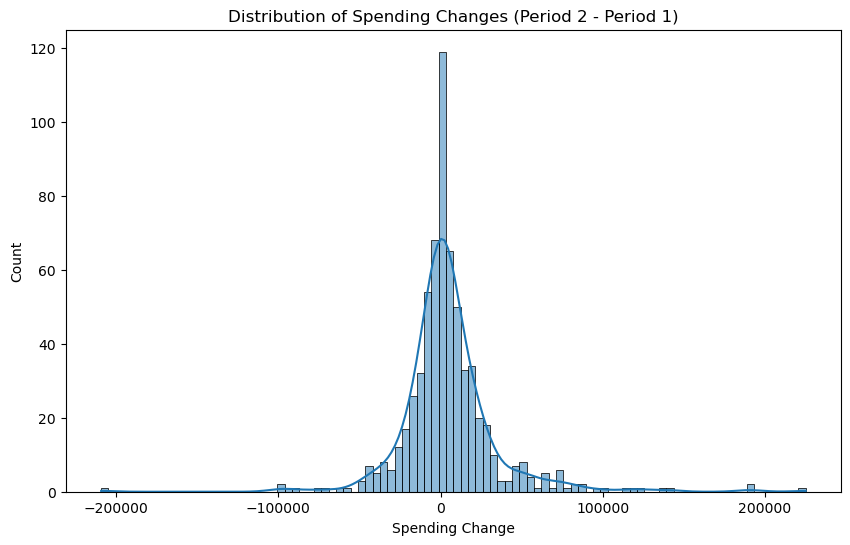

In [61]:
 #Display summary statistics
print("\
Spending summary statistics:")
print(spending_comparison.describe())

# Visualize spending changes
plt.figure(figsize=(10, 6))
sns.histplot(spending_comparison['spending_change'], kde=True)
plt.title('Distribution of Spending Changes (Period 2 - Period 1)')
plt.xlabel('Spending Change')
plt.ylabel('Count')
plt.savefig('spending_changes_distribution.png')


# Show top 10 customers with highest spending increase and decrease
print("\
Top 10 customers with highest spending increase:")
print(spending_comparison.nlargest(10, 'spending_change')[['sum_period1', 'sum_period2', 'spending_change']])

print("\
Top 10 customers with highest spending decrease:")
print(spending_comparison.nsmallest(10, 'spending_change')[['sum_period1', 'sum_period2', 'spending_change']])

## Behaviour analysis, Insights and Trends

## **Behavior Analysis**

- **Assess Customer Behavior:**
  - Evaluate whether customers who purchased clothing in Period 1 continued to purchase clothing in Period 2 or if their spending shifted to other categories or stores.
  - Compare the proportion of customers who exclusively purchased clothing in both periods versus those who switched to other categories or merchants.

## **Insights and Trends**

- **Identify Patterns:**
  - Identify patterns in cross-shop behavior, such as customers who have shifted their spending away from the client's store.
- **Predict Future Trends:**
  - Predict future shopping trends based on current data to inform strategies for improving customer retention and enhancing competitive positioning.

## **Visualizations**

- **Distribution of Spending:**
  - Create histograms to visualize the distribution of total spending on clothing for both periods, using different colors for each period.
- **Customer Spending Patterns:**
  - Generate a chart or graph showing the proportion of customers who continued purchasing clothing versus those who shifted their spending.


Proportion of customers who continued purchasing clothing: 72.43%
Proportion of customers who shifted away from clothing: 12.39%
Top 5 categories for customers who shifted away from clothing:
category
Bank Charges & Fees       24582
Groceries                 14640
Transport & Fuel          11040
Eating Out & Takeaways     8682
Cellphone                  4830
Name: count, dtype: int64
Visualizations have been saved as 'clothing_spending_distribution.png' and 'customer_proportion_pie.png'.
Spending growth rate from Period 1 to Period 2: 27.65%
Prediction: Clothing spending is likely to continue increasing.


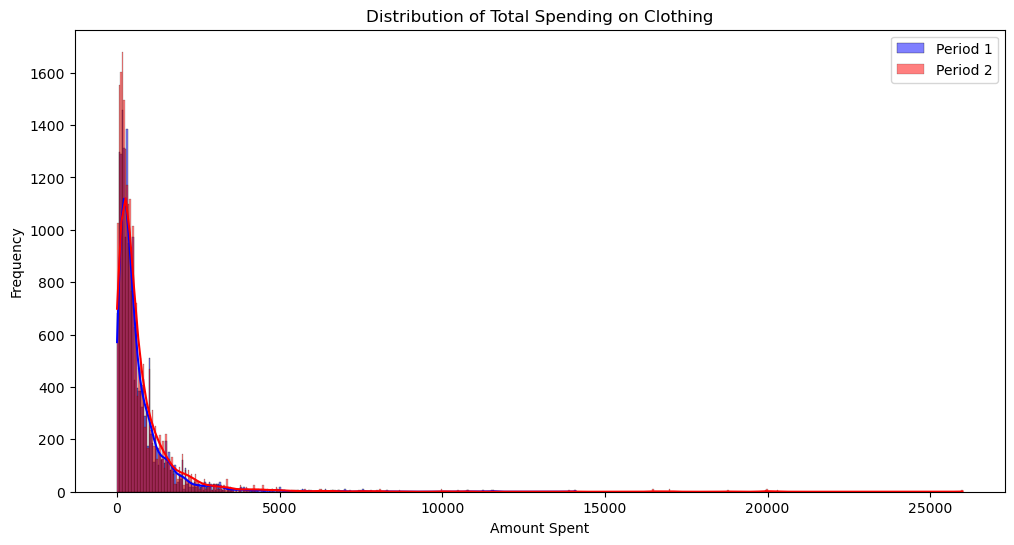

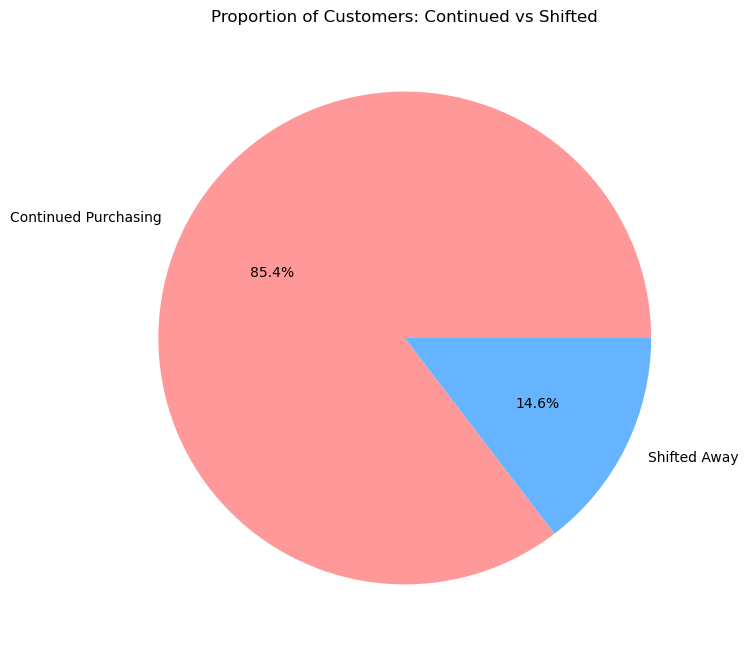

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming it's already in memory from previous analysis)
df = pd.read_parquet('merged_data.parquet')

# Define periods
period1_start = pd.to_datetime('2022-02-01')
period1_end = pd.to_datetime('2022-04-30')
period2_start = pd.to_datetime('2022-09-01')
period2_end = pd.to_datetime('2022-11-30')

# Filter transactions for both periods
period1_transactions = df[(df['transaction_date'].between(period1_start, period1_end))]
period2_transactions = df[(df['transaction_date'].between(period2_start, period2_end))]

# Identify customers who purchased clothing in each period
clothing_customers_period1 = set(period1_transactions[period1_transactions['category'] == 'Clothing']['customer_id'])
clothing_customers_period2 = set(period2_transactions[period2_transactions['category'] == 'Clothing']['customer_id'])

# Customers who purchased clothing in both periods
clothing_customers_both = clothing_customers_period1.intersection(clothing_customers_period2)

# Customers who shifted away from clothing in Period 2
shifted_customers = clothing_customers_period1 - clothing_customers_period2

# Calculate proportions
total_clothing_customers = len(clothing_customers_period1.union(clothing_customers_period2))
proportion_continued = len(clothing_customers_both) / total_clothing_customers
proportion_shifted = len(shifted_customers) / total_clothing_customers

print(f"Proportion of customers who continued purchasing clothing: {proportion_continued:.2%}")
print(f"Proportion of customers who shifted away from clothing: {proportion_shifted:.2%}")

# Analyze spending patterns for shifted customers
shifted_customers_period2 = period2_transactions[period2_transactions['customer_id'].isin(shifted_customers)]
top_categories_shifted = shifted_customers_period2['category'].value_counts().head(5)

print("\
Top 5 categories for customers who shifted away from clothing:")
print(top_categories_shifted)

# Visualizations
# 1. Histogram of total spending on clothing for both periods
plt.figure(figsize=(12, 6))
sns.histplot(period1_transactions[period1_transactions['category'] == 'Clothing']['amount'].abs(), 
             color='blue', alpha=0.5, label='Period 1', kde=True)
sns.histplot(period2_transactions[period2_transactions['category'] == 'Clothing']['amount'].abs(), 
             color='red', alpha=0.5, label='Period 2', kde=True)
plt.title('Distribution of Total Spending on Clothing')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('clothing_spending_distribution.png')


# 2. Pie chart showing proportion of customers who continued vs shifted
plt.figure(figsize=(8, 8))
plt.pie([proportion_continued, proportion_shifted], 
        labels=['Continued Purchasing', 'Shifted Away'], 
        autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Customers: Continued vs Shifted')
plt.savefig('customer_proportion_pie.png')


print("Visualizations have been saved as 'clothing_spending_distribution.png' and 'customer_proportion_pie.png'.")

# Predict future trends (simple example using current data)
total_spending_period1 = period1_transactions[period1_transactions['category'] == 'Clothing']['amount'].sum()
total_spending_period2 = period2_transactions[period2_transactions['category'] == 'Clothing']['amount'].sum()

spending_growth_rate = (total_spending_period2 - total_spending_period1) / total_spending_period1

print(f"\
Spending growth rate from Period 1 to Period 2: {spending_growth_rate:.2%}")

if spending_growth_rate > 0:
    print("Prediction: Clothing spending is likely to continue increasing.")
else:
    print("Prediction: Clothing spending may decrease or stagnate in the future.")



## Overall insights and Recommendations 

## **Insights and Recommendations**

### **Insights**

- **Customer Behavior:**
  - Customers who shifted away from clothing are primarily spending on essential categories like banking, groceries, and transport.

- **Spending Trends:**
  - The spending growth rate from Period 1 to Period 2 is 27.65%.
  - **Prediction:** Clothing spending is likely to continue increasing, indicating a favorable trend for clothing sales.

### **Recommendations**


